In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython as IP
import IPython.display as ipd

In [2]:
labels = pd.read_csv('/content/drive/MyDrive/Gen AI/SoundClassification/EmergencyvsNonEmergencyVehicleSoundClassification-200414-193707/train_fuSp8nd.csv')
labels.head()

ID         Class
0   0         siren
1   1  street_music
2   2      drilling
3   3         siren
4   4      dog_bark

In [3]:
!unzip '/content/drive/MyDrive/Gen AI/SoundClassification/EmergencyvsNonEmergencyVehicleSoundClassification-200414-193707/train.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Train/1674.wav          
  inflating: Train/1675.wav          
  inflating: Train/1677.wav          
  inflating: Train/1678.wav          
  inflating: Train/1679.wav          
  inflating: Train/168.wav           
  inflating: Train/1680.wav          
  inflating: Train/1681.wav          
  inflating: Train/1686.wav          
  inflating: Train/1687.wav          
  inflating: Train/1688.wav          
  inflating: Train/1689.wav          
  inflating: Train/1690.wav          
  inflating: Train/1695.wav          
  inflating: Train/1697.wav          
  inflating: Train/1699.wav          
  inflating: Train/17.wav            
  inflating: Train/170.wav           
  inflating: Train/1701.wav          
  inflating: Train/1702.wav          
  inflating: Train/1703.wav          
  inflating: Train/1704.wav          
  inflating: Train/1705.wav          
  inflating: Train/1706.wav          
  inflating: Train/1708.wav          

In [4]:
labels.shape

(5435, 2)

In [5]:
labels['Class'].value_counts()

Class
jackhammer          668
engine_idling       624
siren               607
street_music        600
drilling            600
dog_bark            600
children_playing    600
air_conditioner     600
car_horn            306
gun_shot            230
Name: count, dtype: int64

In [6]:
# Read every file header to collect audio properties
audiodata = []
for index, row in labels.iterrows():
    cat = str(row["Class"])
    id = str(row["ID"])
    file_name = '/content/Train/' + str(id) + '.wav'

    y, sr = librosa.load(file_name, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    channels = 1 if y.ndim == 1 else y.shape[0]  # librosa loads mono as 1-D array and stereo as 2-D array

    audiodata.append((file_name, cat, duration, channels, sr))

# Convert into a Pandas dataframe
audiodatadf = pd.DataFrame(audiodata, columns=['file', 'class', 'duration', 'channels','sample_rate'])

In [7]:
audiodatadf.head()

file         class  duration  channels  sample_rate
0  /content/Train/0.wav         siren       4.0         1        44100
1  /content/Train/1.wav  street_music       4.0         1        48000
2  /content/Train/2.wav      drilling       4.0         1        44100
3  /content/Train/3.wav         siren       4.0         1        44100
4  /content/Train/4.wav      dog_bark       4.0         1        44100

In [31]:
audiodatadf.shape

(5435, 5)

In [32]:
labels.tail()

ID            Class
5430  8725    engine_idling
5431  8726         dog_bark
5432  8727    engine_idling
5433  8728    engine_idling
5434  8729  air_conditioner

In [33]:
audiodatadf.tail()

file            class  duration  channels  \
5430  /content/Train/8725.wav    engine_idling  4.000000         1   
5431  /content/Train/8726.wav         dog_bark  2.206463         1   
5432  /content/Train/8727.wav    engine_idling  4.000000         1   
5433  /content/Train/8728.wav    engine_idling  4.000000         1   
5434  /content/Train/8729.wav  air_conditioner  4.000000         1   

      sample_rate  
5430        48000  
5431        44100  
5432        48000  
5433        48000  
5434        44100

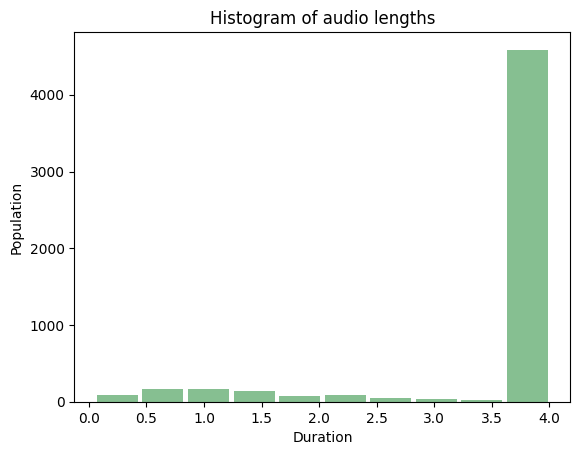

Greater than 3 seconds: 4629
Lower than 3 seconds: 806
Lower than 1.5 seconds: 529


In [8]:
plt.hist(audiodatadf['duration'], rwidth=0.9, color='#86bf91')

plt.xlabel('Duration')
plt.ylabel('Population')
plt.title('Histogram of audio lengths')
plt.grid(False)
plt.show()

# Count samples with duration > 3 sec
gt_3sec = audiodatadf['duration'][audiodatadf['duration'] > 3].count()
lt_3sec = audiodatadf['duration'][audiodatadf['duration'] < 3].count()
lt_15sec = audiodatadf['duration'][audiodatadf['duration'] < 1.5].count()

# Display counts of interest
print("Greater than 3 seconds: {}".format(gt_3sec))
print("Lower than 3 seconds: {}".format(lt_3sec))
print("Lower than 1.5 seconds: {}".format(lt_15sec))

In [11]:
audiodatadf['channels'].value_counts(normalize=True)

channels
1    1.0
Name: proportion, dtype: float64

In [12]:
audiodatadf['sample_rate'].value_counts(normalize=True)

sample_rate
44100    0.598896
48000    0.305980
96000    0.066053
24000    0.009752
16000    0.007176
22050    0.006624
11025    0.003680
8000     0.001104
32000    0.000736
Name: proportion, dtype: float64

In [14]:
row = audiodatadf[audiodatadf['class'] == 'engine_idling'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [15]:
row = audiodatadf[audiodatadf['class'] == 'children_playing'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [16]:
row = audiodatadf[audiodatadf['class'] == 'jackhammer'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [17]:
row = audiodatadf[audiodatadf['class'] == 'siren'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [18]:
row = audiodatadf[audiodatadf['class'] == 'street_music'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [19]:
row = audiodatadf[audiodatadf['class'] == 'drilling'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [20]:
row = audiodatadf[audiodatadf['class'] == 'dog_bark'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [21]:
row = audiodatadf[audiodatadf['class'] == 'air_conditioner'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [22]:
row = audiodatadf[audiodatadf['class'] == 'car_horn'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [23]:
row = audiodatadf[audiodatadf['class'] == 'gun_shot'].sample(1).iloc[0]
file_name = row['file']

# Load the audio file using librosa
y, sr = librosa.load(file_name, sr=None)

# Play the audio sample
ipd.Audio(data=y, rate=sr)

In [25]:
row = audiodatadf.sample(1).iloc[0]
file_name = row['file']
file_name

'/content/Train/7530.wav'

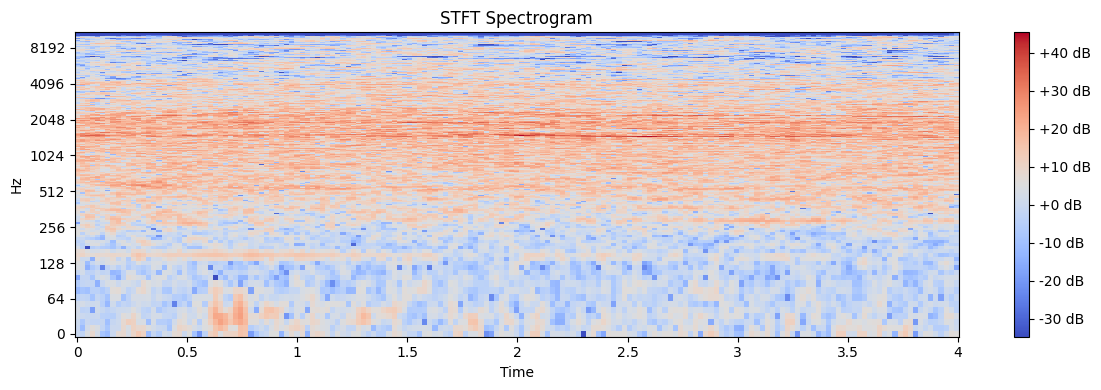

In [27]:
# Windowing
n_fft=2048
hop_length=512

# Load audio file
y, sr = librosa.load(file_name)

# Normalize between -1 and 1
normalized_y = librosa.util.normalize(y)

# Compute STFT
stft = librosa.core.stft(normalized_y, n_fft=n_fft, hop_length=hop_length)

# Convert sound intensity to log amplitude:
stft_db = librosa.amplitude_to_db(abs(stft))


# Plot spectrogram from STFT
plt.figure(figsize=(12, 4))
librosa.display.specshow(stft_db, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB');
plt.title('STFT Spectrogram')
plt.tight_layout()
plt.show()

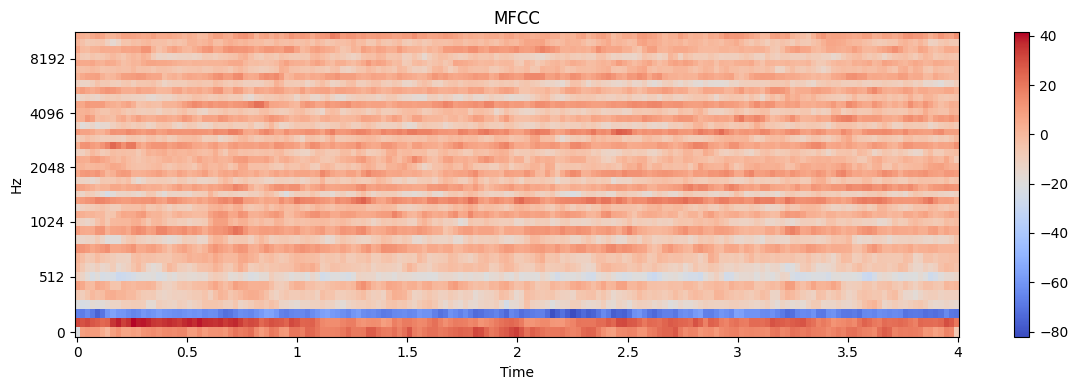

In [28]:
# Generate MFCC coefficients
mfcc = librosa.feature.mfcc(y=normalized_y, sr=sr, n_mfcc=40)

# Plot spectrogram from STFT
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [29]:
n_mels = 128

# Generate mel scaled spectrogram
mel = librosa.feature.melspectrogram(S=stft, n_mels=n_mels)

# Convert sound intensity to log amplitude:
mel_db = librosa.amplitude_to_db(abs(mel))

# Normalize between -1 and 1
normalized_mel = librosa.util.normalize(mel_db)

# Plot spectrogram from STFT
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_db, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB');
plt.title('MEL-Scaled Spectrogram')
plt.tight_layout()
plt.show()

In [34]:
# Iterate through all audio files and extract MFCC
features = []
labels_ = []
frames_max = 0
counter = 0
total_samples = len(audiodatadf)
n_mfcc = 40

for index, row in audiodatadf.iterrows():
    file_name = row['file']
    class_label = row["class"]

    # Extract MFCCs (do not add padding)
    # mfccs = helpers.get_mfcc(file_path, 0, n_mfcc)
    y, sr = librosa.load(file_name, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Save current frame count
    num_frames = mfccs.shape[1]

    # Add row (feature / label)
    features.append(mfccs)
    labels_.append(class_label)

    # Update frames maximum
    if (num_frames > frames_max):
        frames_max = num_frames

    # Notify update every N files
    if (counter == 500):
        print("Status: {}/{}".format(index+1, total_samples))
        counter = 0

    counter += 1

print("Finished: {}/{}".format(index, total_samples))

Status: 501/5435
Status: 1001/5435
Status: 1501/5435
Status: 2001/5435
Status: 2501/5435
Status: 3001/5435
Status: 3501/5435
Status: 4001/5435
Status: 4501/5435
Status: 5001/5435
Finished: 5434/5435


In [35]:
features[0].shape

(40, 345)

In [37]:
frames_max

751

In [38]:
def pad_features(feature_list, frames_max):
    # Determine the number of features (x)
    num_features = feature_list[0].shape[0]

    # Initialize a list to hold the padded features
    padded_list = []

    for features in feature_list:
        num_frames = features.shape[1]
        if num_frames < frames_max:
            # Create a zero matrix with shape (num_features, frames_max)
            padded_features = np.zeros((num_features, frames_max))
            # Copy the original features into the zero matrix
            padded_features[:, :num_frames] = features
        else:
            # If the original features have more frames than frames_max, truncate them
            padded_features = features[:, :frames_max]

        # Append the padded (or truncated) features to the list
        padded_list.append(padded_features)

    return padded_list

In [39]:
padded_features = pad_features(features, frames_max)

In [41]:
padded_features[0].shape

(40, 751)

In [43]:
labels_[:5]

['siren', 'street_music', 'drilling', 'siren', 'dog_bark']

In [44]:
# Verify shapes
print("Raw features length: {}".format(len(features)))
print("Padded features length: {}".format(len(padded_features)))
print("Feature labels length: {}".format(len(labels_)))

Raw features length: 5435
Padded features length: 5435
Feature labels length: 5435


In [45]:
# Convert features (X) and labels (y) to Numpy arrays
X = np.array(padded_features)
y = np.array(labels)

In [46]:
# Optionally save the features to disk
np.save("/content/drive/MyDrive/Gen AI/SoundClassification/EmergencyvsNonEmergencyVehicleSoundClassification-200414-193707/X-mfcc_ass", X)
np.save("/content/drive/MyDrive/Gen AI/SoundClassification/EmergencyvsNonEmergencyVehicleSoundClassification-200414-193707/y-mfcc_ass", y)

In [47]:
# Iterate through all audio files and extract MFCC
features = []
labels_ = []
frames_max = 0
counter = 0
total_samples = len(audiodatadf)
n_mels=40

for index, row in audiodatadf.iterrows():
    file_name = row['file']
    class_label = row["class"]

    # Extract Log-Mel Spectrograms (do not add padding)
    # mels = helpers.get_mel_spectrogram(file_path, 0, n_mels=n_mels)

    y, sr = librosa.load(file_name, sr=None)
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)

    # Save current frame count
    num_frames = mels.shape[1]

    # Add row (feature / label)
    features.append(mels)
    labels_.append(class_label)

    # Update frames maximum
    if (num_frames > frames_max):
        frames_max = num_frames

    # Notify update every N files
    if (counter == 500):
        print("Status: {}/{}".format(index+1, total_samples))
        counter = 0

    counter += 1

print("Finished: {}/{}".format(index, total_samples))

Status: 501/5435
Status: 1001/5435
Status: 1501/5435
Status: 2001/5435
Status: 2501/5435
Status: 3001/5435
Status: 3501/5435
Status: 4001/5435
Status: 4501/5435
Status: 5001/5435
Finished: 5434/5435


In [48]:
frames_max

751

In [49]:
padded_features = pad_features(features, frames_max)

In [50]:
padded_features[0].shape

(40, 751)

In [51]:
labels_[:5]

['siren', 'street_music', 'drilling', 'siren', 'dog_bark']

In [52]:
# Verify shapes
print("Raw features length: {}".format(len(features)))
print("Padded features length: {}".format(len(padded_features)))
print("Feature labels length: {}".format(len(labels_)))

Raw features length: 5435
Padded features length: 5435
Feature labels length: 5435


In [53]:
# Convert features (X) and labels (y) to Numpy arrays
X = np.array(padded_features)
y = np.array(labels)

In [54]:
# Optionally save the features to disk
np.save("/content/drive/MyDrive/Gen AI/SoundClassification/EmergencyvsNonEmergencyVehicleSoundClassification-200414-193707/X-mel_ass", X)
np.save("/content/drive/MyDrive/Gen AI/SoundClassification/EmergencyvsNonEmergencyVehicleSoundClassification-200414-193707/y-mel_ass", y)